
# CODE TO PERFORM POLYNOMIAL REGRESSION TO PREDICT SALARY VS. NUMBER OF YEARS OF EXPERIENCE
# Brilliant



# PROBLEM STATEMENT

- Let's assume that you work as a consultant to a start-up company that has just started to hire employees. The HR director reached out to you and asked you to predict the salary of employees based on the number of years of experience. You suggested to use a polynomial regression model to try to create a model using the provided dataset. 
- Image Source: https://pxhere.com/en/photo/1449321

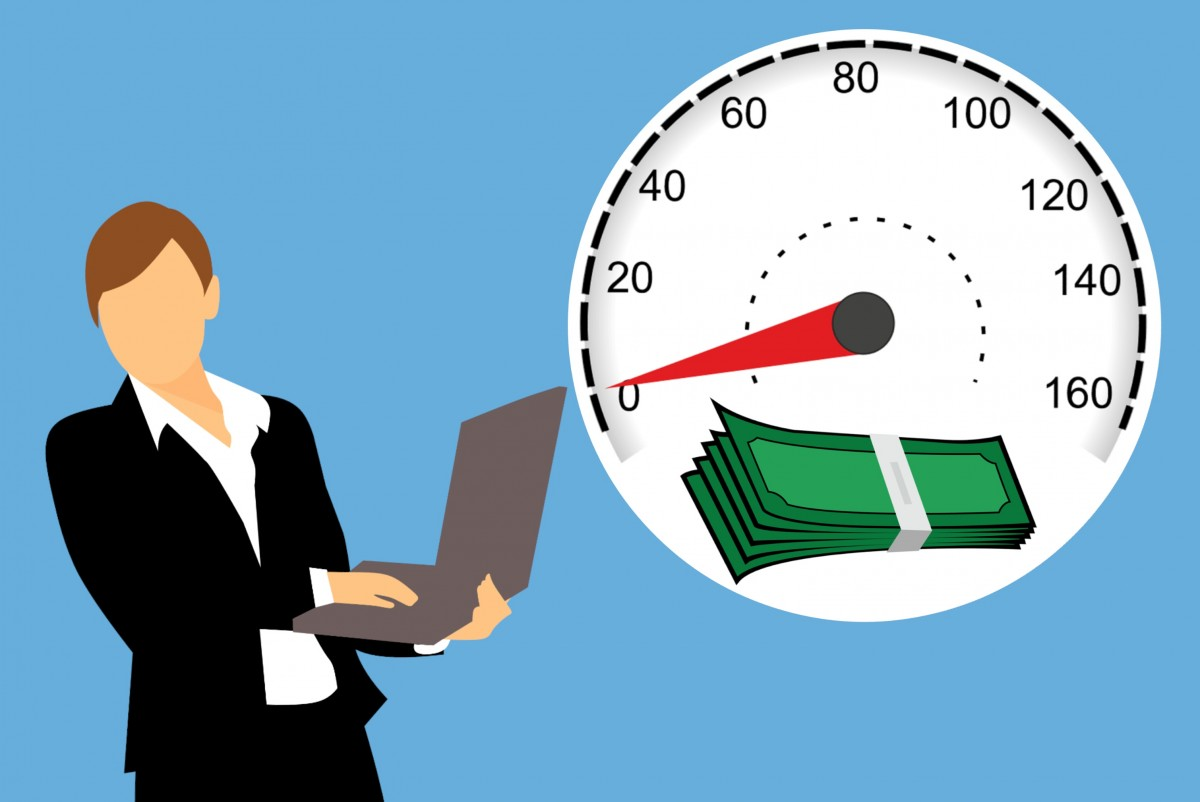

# STEP#1: IMPORT LIBRARIES 

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# STEP#2: IMPORT DATASET

In [2]:
#Import data
salary = pd.read_csv("Employee_Salary.csv")

In [3]:
salary.head(10)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
5,2.682068,69119.79132
6,2.761983,71063.36476
7,2.927601,71356.14382
8,2.969968,74265.40359
9,3.059107,74804.11404


In [4]:
salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


# STEP#3: VISUALIZE DATASET

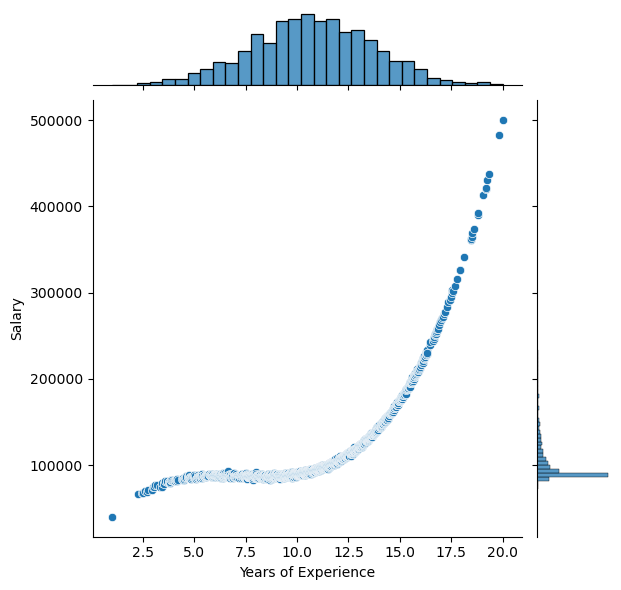

In [7]:
sns.jointplot(x='Years of Experience', y='Salary', data = salary)

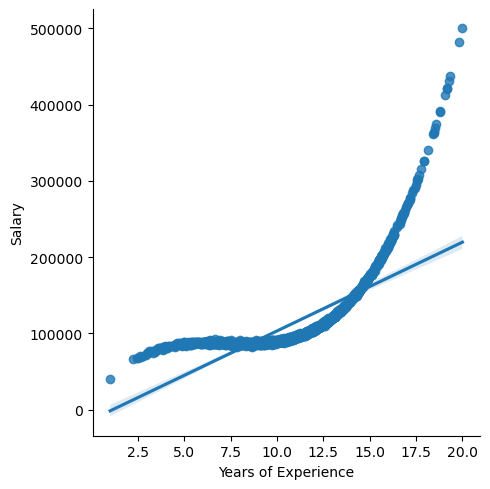

In [8]:
sns.lmplot(x='Years of Experience', y='Salary', data=salary)

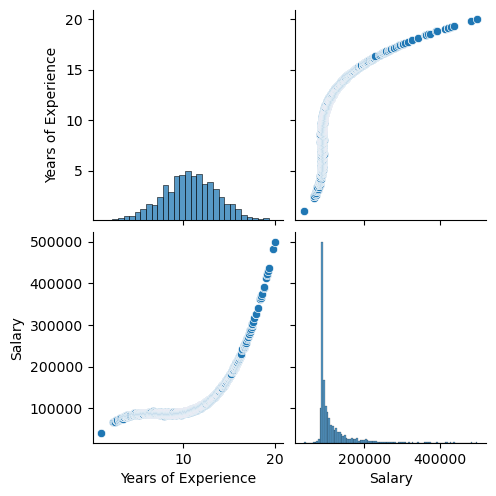

In [9]:
sns.pairplot(salary)

# STEP#4: CREATE TRAINING DATASET

In [10]:
X = salary[['Years of Experience']]

In [11]:
y = salary['Salary']

In [12]:
# Note that we used the entire dataset for training
X_train = X
y_train = y

# (SOLUTION #1: LINEAR ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [13]:
y_train.shape

(2000,)

In [14]:
X_train.shape

(2000, 1)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression(fit_intercept = True)

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [11640.22916165]
Linear Model Coefficient (b):  -13063.099315186977


# STEP#6: VISUALIZE THE RESULTS

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

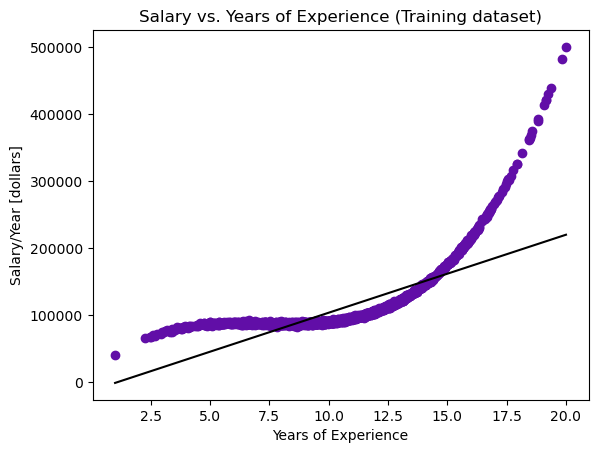

In [21]:
plt.scatter(X_train, y_train, color = '#610EA7')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')

# (SOLUTION #2: POLYNOMIAL ASSUMPTION)

# STEP#5 MODEL TRAINING 

In [22]:
# import a class and instantiate an object from that class 
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)


In [23]:
# Transform the matrix of features X into a multi array of features X_Columns 
# which contains the original features and their associated polynomial terms 
X_columns = poly_regressor.fit_transform(X_train)

In [24]:
print(X_columns)

[[  1.           1.           1.        ]
 [  1.           2.25794198   5.09830199]
 [  1.           2.45087546   6.00679053]
 ...
 [  1.          19.35336879 374.55288352]
 [  1.          19.84251968 393.72558725]
 [  1.          20.         400.        ]]


In [25]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [26]:
print('Model Coefficients: ', regressor.coef_)

Model Coefficients:  [     0.         -33106.32895617   2095.78613853]


# STEP#6: VISUALIZE THE RESULTS

In [27]:
X_train.shape

(2000, 1)

In [28]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

In [29]:
y_predict.shape

(2000,)

Text(0.5, 1.0, 'Salary vs. Years of Experience (Training dataset)')

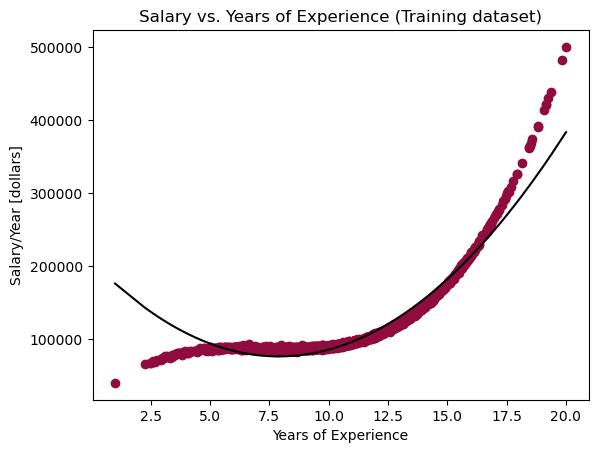

In [31]:
plt.scatter(X_train, y_train, color = '#900C3F')
plt.plot(X_train, y_predict, color = 'black')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Training dataset)')

# EXCELLENT JOB! NOW YOU BECAME FAMILIAR WITH POLYNOMIAL REGRESSION, LET'S PRACTICE WITH MORE PROJECTS!